# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import random
from scipy import stats
import statsmodels.stats.weightstats as ws
%matplotlib inline
sns.set()

In [48]:
# importing data into a pandas dataframe
df = pd.read_csv('data/human_body_temperature.csv')

In [210]:
#checking the data
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [50]:
#significance level alpha
alpha =  0.05

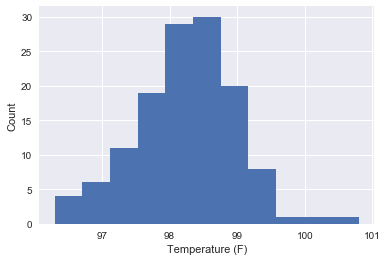

In [15]:
# Analyzing temperature data using histogram
_ = plt.hist(df.temperature, bins=11)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Count')

In [17]:
import numpy as np

In [20]:
# definig a function to calculate empirical cumultive distribution function (ECDF)

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/ len(x)
    return x, y

In [21]:
temp_x, temp_y = ecdf(df.temperature)

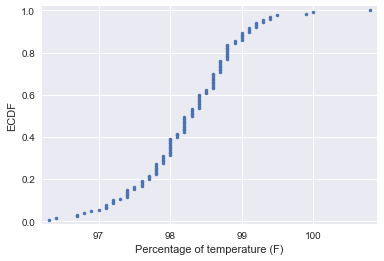

In [25]:
#plotting ECDF for temperature data 
_ = plt.plot(temp_x, temp_y,marker=".", linestyle='none')
_ = plt.xlabel('Percentage of temperature (F)')
_ = plt.ylabel('ECDF')
plt.margins(0.02)

In [27]:
# computing mean and std to parameterize normal distribution
mean = np.mean(df.temperature)
std = np.std(df.temperature)
samples = np.random.normal(mean, std, size=10000)

#calculating theortical x and y from the normally distributed samples
x_theor, y_theor = ecdf(samples)

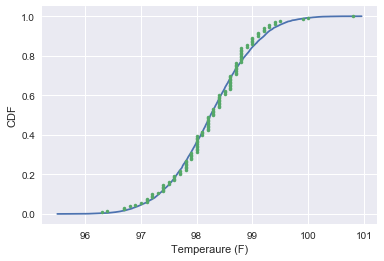

In [28]:
#plotting theoritical and empirical CDFs on the same plot to check the normality
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(temp_x, temp_y, marker=".", linestyle="none")
_ = plt.xlabel('Temperaure (F)')
_ = plt.ylabel('CDF')

From the above theroritical and empirical CDFs, it seems that data is normally distributed

In [43]:
#performing che square test
chi, p = stats.normaltest(df.temperature)

In [44]:
print(chi, p)

2.70380143332 0.258747986349


In [51]:
if p <= alpha:
    print('We can reject the null hypothesis at alpha = 0.05')
else:
    print('We cannot reject the null hypothesis at alpha = 0.05')

We cannot reject the null hypothesis at alpha = 0.05


The ECDF curve and the chi sqare test both suggest that the data is normally distributed.

2) Is the sample size large? Are the observations independent?

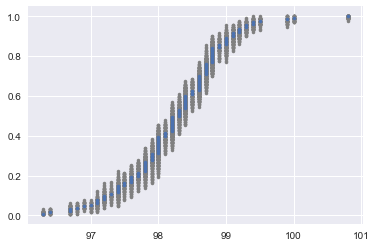

In [29]:
# We will use bootstrap samples to determine if the sample size is large and observations are independent

# For loop to calculate ECDF and generate the plots

for _ in range(50):
    #generating bootstrap samples
    bs_temperature = np.random.choice(df.temperature, size=len(df.temperature))
    
    #computing and plotting ECDFs
    x, y = ecdf(bs_temperature)
    _ = plt.plot(x, y, marker='.', linestyle='none', color='gray')
    
#plotting ecdf from original data
temp_x, temp_y = ecdf(df.temperature)
_ = plt.plot(temp_x, temp_y, marker='.', linestyle='none')

Answer: Since the bootstrap samples approximately follows the distribution of the original data, we can assume that the sample is large enough and the observations are independent.

    3. Is the true population mean really 98.6 degrees F?
        Would you use a one-sample or two-sample test? Why?
        In this situation, is it appropriate to use the  tt  or  zz  statistic?
        Now try using the other test. How is the result be different? Why?

We will perform one-sample test in this case since we are comparing one set of data to a single number 98.6 F
Since the sample size is > 30 we will use z-score here
We will also use bootstrap method to obtain the p-value that mean is less than 98.6 F

In [61]:
tempmean = 98.6
(z,p1) = ws.ztest(df.temperature, value=tempmean)

In [71]:
if p1 <= alpha:
    print('We can reject the null hypothesis at alpha = 0.05 that data mean is equal to 98.6 with p-value =' + str(p1))
else:
    print('We cannot reject the null hypothesis at alpha = 0.05 that data mean is equal to 98.6 with p-value =' + str(p1))

We can reject the null hypothesis at alpha = 0.05 that data mean is equal to 98.6 with p-value =4.9021570141e-08


In [69]:
(t, p2) = scipy.stats.ttest_1samp(df.temperature, tempmean)

In [72]:
if p2 <= alpha:
    print('We can reject the null hypothesis at alpha = 0.05 that data mean is equal to 98.6 with p-value =' + str(p2))
else:
    print('We cannot reject the null hypothesis at alpha = 0.05 that data mean is equal to 98.6 with p-value =' + str(p2))

We can reject the null hypothesis at alpha = 0.05 that data mean is equal to 98.6 with p-value =2.41063204156e-07


both z and t test shows that mean is not equal to 98.6 F

In [96]:
#defining fuction to obtain replicates of bootstrap samples
def bs_replicate_samples(data, func):
    return func(np.random.choice(data, size=len(data)))
    

In [97]:
# defining a function to obtain confidence interval of several bootstrap replicates
def draw_bs_replicate(data, func, size=1):
    #obtaining random bootstrap samples
    
    bs_replicate = np.empty(size)
    
    for i in range(size):
        bs_replicate[i] = bs_replicate_samples(data, func)
        
    return bs_replicate

Using bootstrap to test the null hypothesis: mean temperature is equal to 98.6 F

In [102]:
#Shift the data to have a mean equal to the mean for hypothesis testing, tempmean = 98.6 F
shifted_temp = df.temperature - np.mean(df.temperature) + tempmean

In [111]:
# defining a function to calculate test statistics: difference of mean

def diff_temp_mean(data, tempmean=98.6):
    return np.mean(data) - tempmean
    
diff_obs = diff_temp_mean(df.temperature)
print(diff_obs)

-0.35076923076921673


In [133]:
# draw bootstrap replicates using previously defined function draw_bs_replicate
bs_replicates = draw_bs_replicate(shifted_temp, diff_temp_mean, 10000)

In [161]:
#calculating p-value
p_value = np.sum(bs_replicates <= diff_obs)/10000
if p_value <= alpha:
    print('We can reject the null hypothesis at alpha = 0.05 that data mean is equal to 98.6 with p-value =' + str(p_value))
else:
    print('We cannot reject the null hypothesis at alpha = 0.05 that data mean is equal to 98.6 with p-value =' + str(p_value))

We can reject the null hypothesis at alpha = 0.05 that data mean is equal to 98.6 with p-value =0.0


We again observed that the mean of observed data is less than 98.6 F

4.Draw a small sample of size 10 from the data and repeat both tests.

Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [211]:
#drawing a sample of 10 from the dataset
df1 = df.sample(10, replace=False)

Since the sample size is < 30 we should use t-test here but we will use both to check the difference

In [166]:
#calculating z score and corresponding p-value(p3)
(z2, p3) = ws.ztest(df1.temperature, value=tempmean)

In [169]:
if p3 <= alpha:
    print('We can reject the null hypothesis at alpha = 0.05 that data mean is equal to 98.6 with p-value =' + str(p3))
else:
    print('We cannot reject the null hypothesis at alpha = 0.05 that data mean is equal to 98.6 with p-value =' + str(p3))

We cannot reject the null hypothesis at alpha = 0.05 that data mean is equal to 98.6 with p-value =0.069554422945


In [170]:
#calculating t score and corresponding p-value(p4)
(t2, p4) = scipy.stats.ttest_1samp(df1.temperature, tempmean)

In [171]:
if p4 <= alpha:
    print('We can reject the null hypothesis at alpha = 0.05 that data mean is equal to 98.6 with p-value =' + str(p4))
else:
    print('We cannot reject the null hypothesis at alpha = 0.05 that data mean is equal to 98.6 with p-value =' + str(p4))

We cannot reject the null hypothesis at alpha = 0.05 that data mean is equal to 98.6 with p-value =0.102948437417


It is interesting to observe that when we used a small sample the null hypotheis was not rejected and we can say that the mean temperature of the sample is approximaltely  equal to 98.6 F with p-value > alpha(0.05).

    5. At what temperature should we consider someone's temperature to be "abnormal"?
    Start by computing the margin of error and confidence interval.

In [172]:
#drawing bootstrap repliactes
bs_replicates = draw_bs_replicate(df.temperature, np.mean, 10000)

#calculating 95% confidence intervals
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int)

[ 98.12307692  98.37307692]


So the 95% confidence interval is between 98.12538462 and 98.37538462. Any temperature below or above this range can be considered as abnormal.

In [183]:
#calculating margin of error
z_ppf = scipy.stats.norm.ppf (1-(alpha/2))

margin_of_error = z_ppf * df.temperature.std()/np.sqrt(len(df))
print ('margin of error for alpha=0.05 is ' + str(margin_of_error))

margin of error for alpha=0.05 is 0.126034341049


    6. Is there a significant difference between males and females in normal temperature?
    What test did you use and why?
    Write a story with your conclusion in the context of the original problem.

In [188]:
#Seperating male and female groups
df_male = df[df['gender']=='M']
df_female= df[df['gender']=='F']

In [195]:
#empirical mean difference between group of males and females
emp_diff_mean = np.mean(df_female.temperature) - np.mean(df_male.temperature)
print(emp_diff_mean)

0.289230769230727


We will used bootstrap method to check the null hypothesis: mean normal temperature of male and females are equal

In [209]:
#calculating mean normal temperature of the whole dataset
obs_mean = np.mean(df.temperature)

#generating shifted arrays
female_shifted = df_female.temperature - np.mean(df_female.temperature) + obs_mean
male_shifted = df_male.temperature - np.mean(df_male.temperature) + obs_mean

#generating bootstrap replicates for mean normal temperatures of male and female groups 
bs_female_temp = draw_bs_replicate(female_shifted, np.mean, 10000)
bs_male_temp = draw_bs_replicate(male_shifted, np.mean, 10000)

#getting replicates of differences of mean
bs_diff = bs_female_temp - bs_male_temp

p_diff = np.sum(bs_diff >= emp_diff_mean)/len(bs_diff)


if p_diff <= alpha:
    print('We can reject the null hypothesis at alpha = 0.05 that mean of both groups are equal with p-value =' + str(p_diff))
else:
    print('We cannot reject the null hypothesis at alpha = 0.05 that mean of both groups are equal with p-value =' + str(p_diff))

We can reject the null hypothesis at alpha = 0.05 that mean of both groups are equal with p-value =0.0099


In this exercise the observed body normal temperature for several people was compared to 98.6 F using t and z tests. The analysis showed that the mean pemperature is not equal to 98.6 F. The analysis further showed that the normal body temperature for female group is higher than male group.